# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [49]:
# reading data
df = pd.read_csv('INNHotelsGroup.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Overview

- Observations
- Sanity checks

In [50]:
# general dataset info - non missing values, DTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We have 36275 rows of data and 18 columns.
5 - object, 14 - numeric
All missing values are coded. e.g. type_of_meal_plan - "not selected".

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

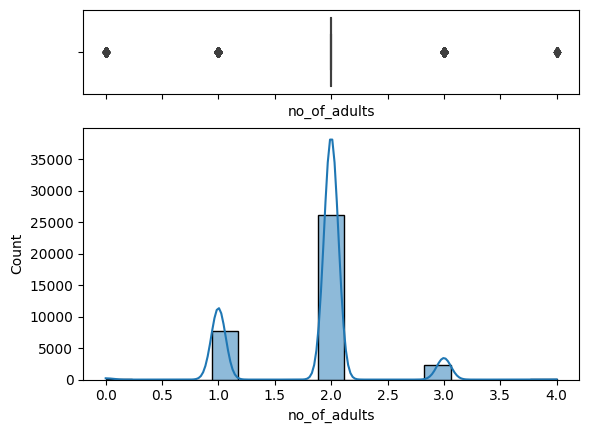

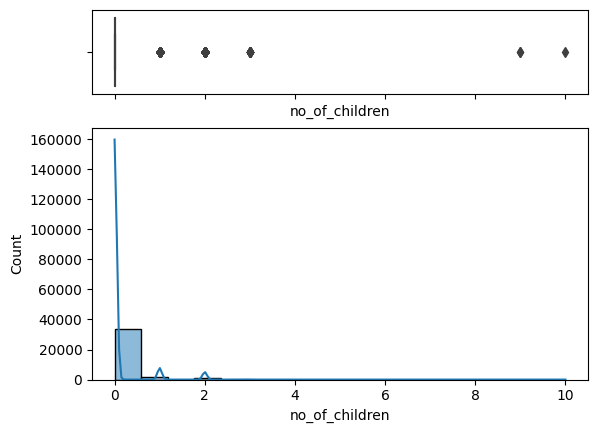

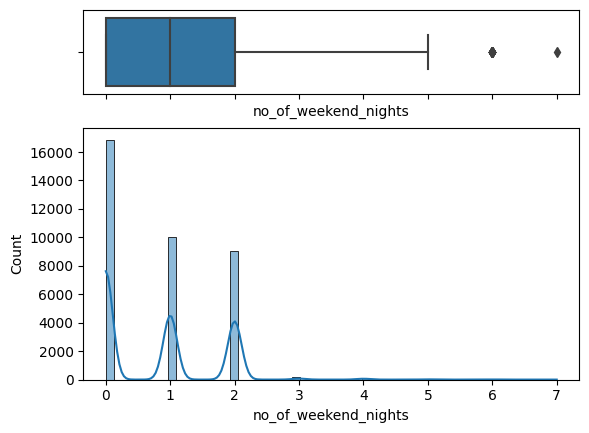

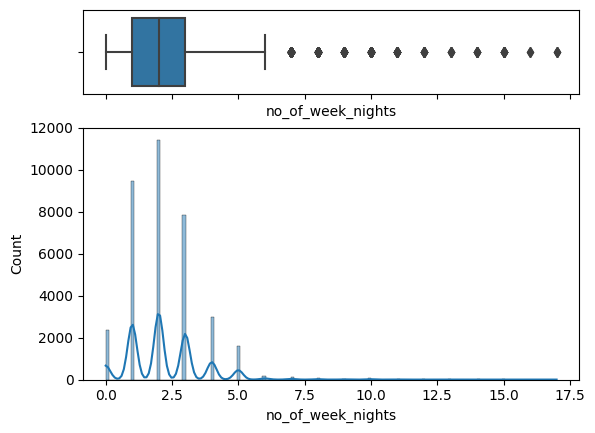

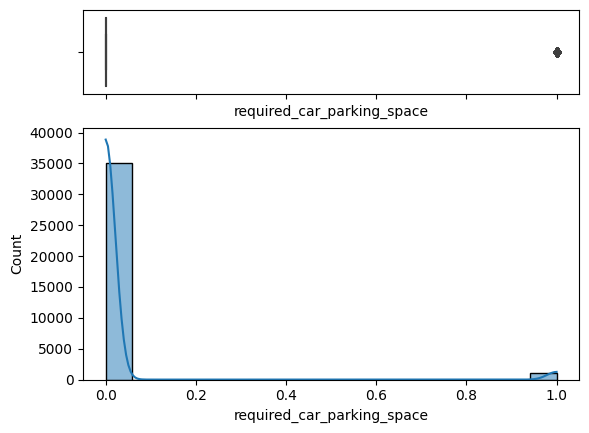

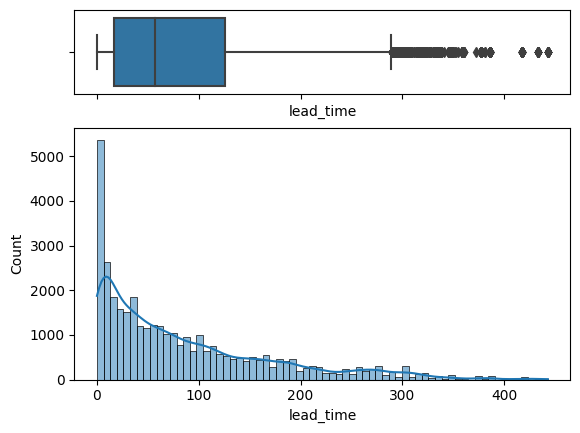

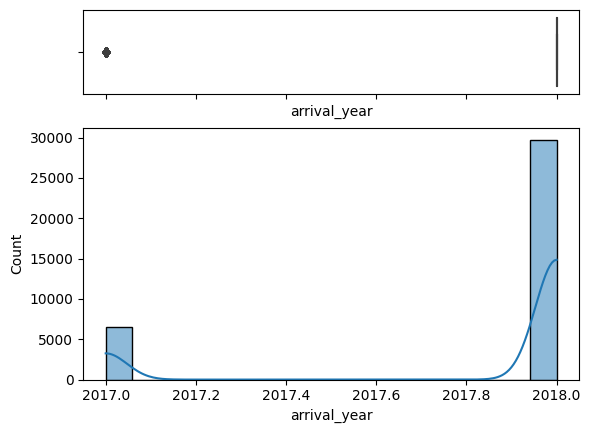

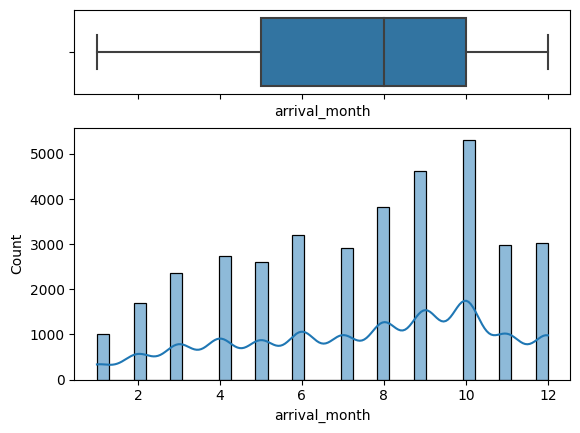

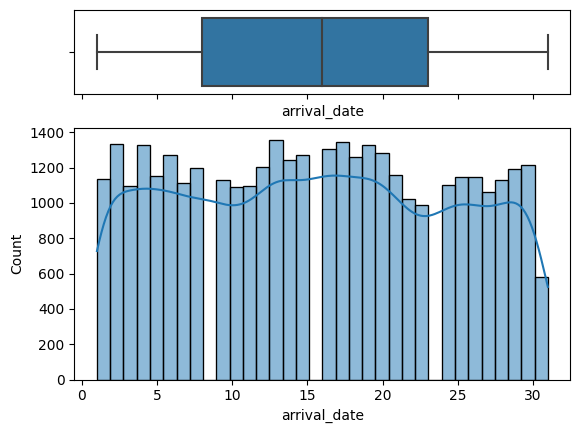

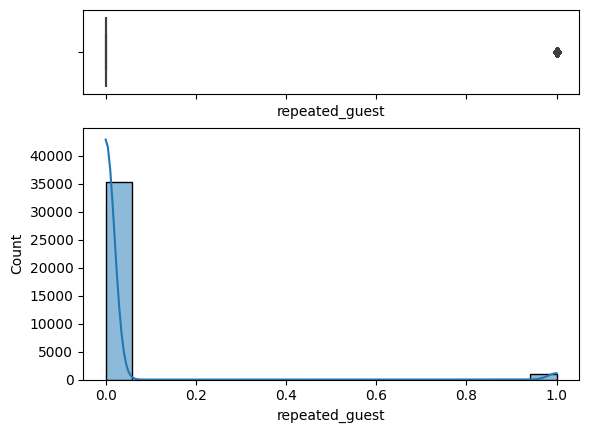

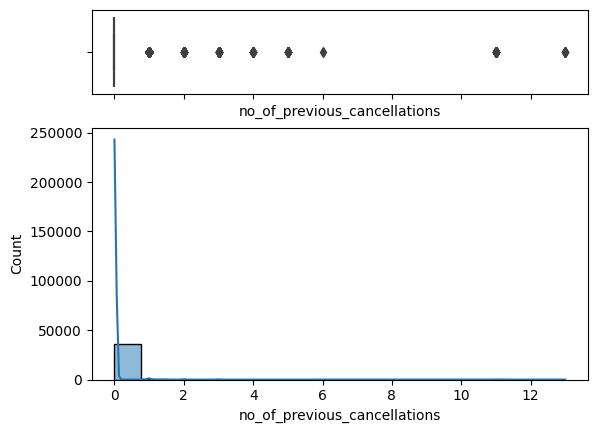

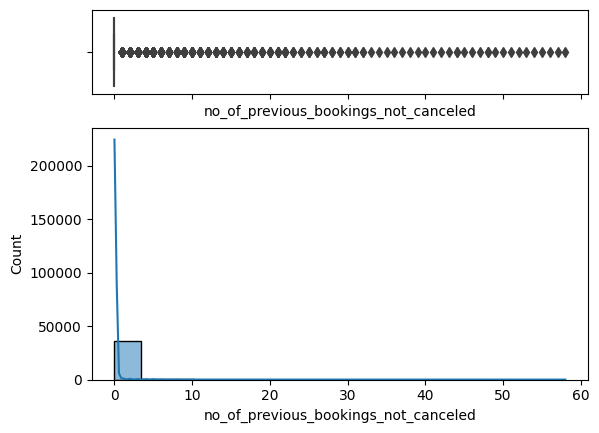

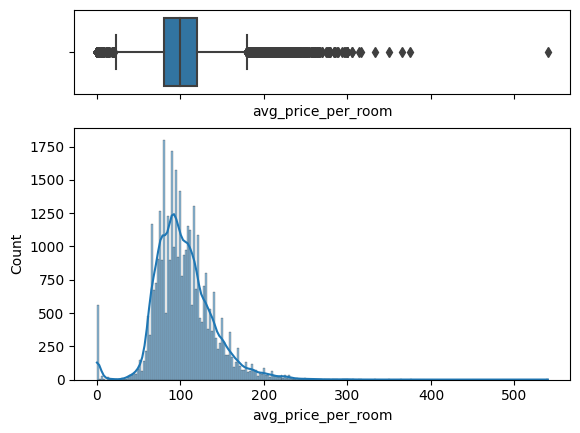

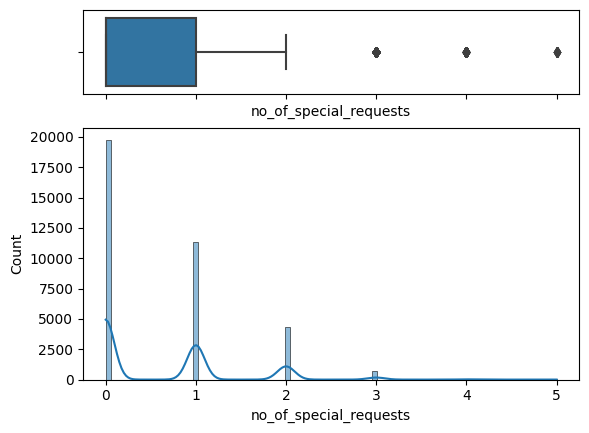

In [51]:
# Univariate analysis

def univariate_numeric(feature):
  # function to plot description of numeric features
  # plots boxplot and histplot charts with sharing common axis

  fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, ncols = 1, sharex = True, 
                                        gridspec_kw = {'height_ratios': (0.25, 0.75)})
  sns.boxplot(data = df, x = feature, ax = ax_box)
  sns.histplot(df[feature], kde=True, ax = ax_hist)
  plt.show()


features_num = df.select_dtypes(include = ['int', 'float']).columns

for feature in features_num:
  univariate_numeric(feature)

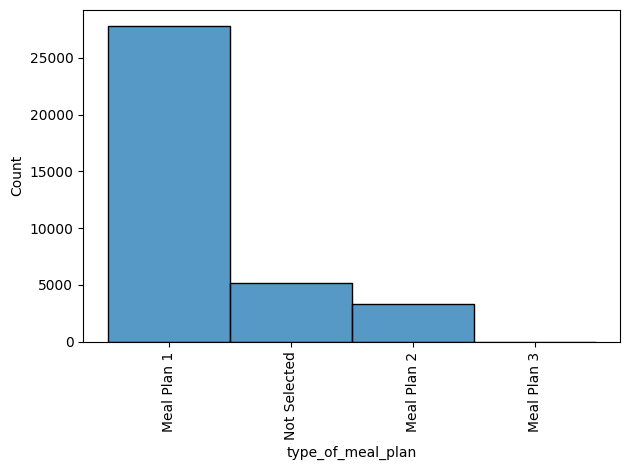

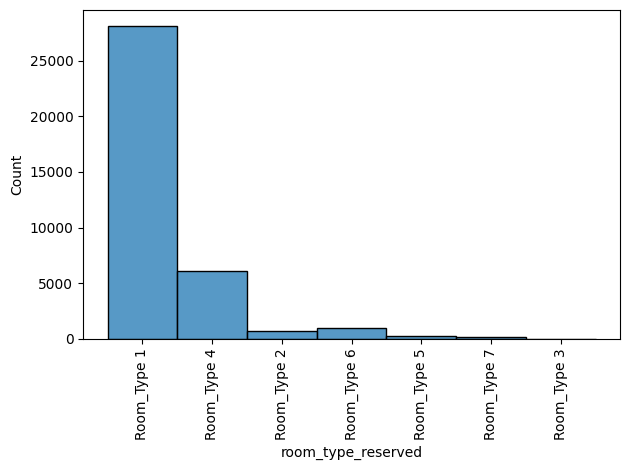

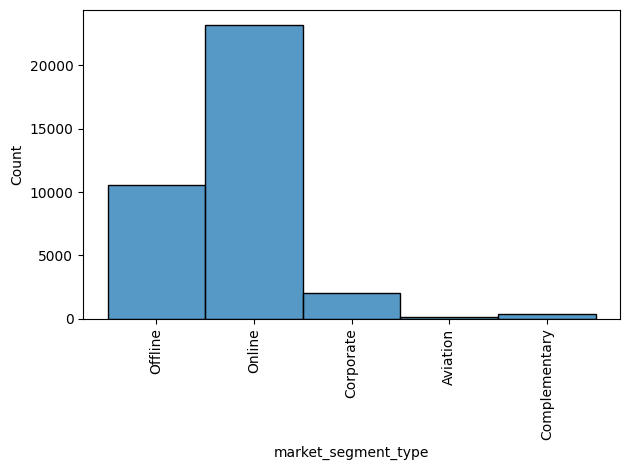

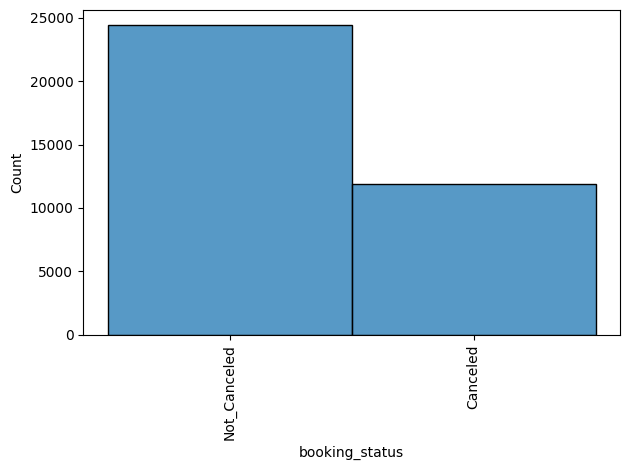

In [52]:
features_cat = list(df.select_dtypes(include = 'object').columns)

features_cat.remove('Booking_ID')

for feature in features_cat:
  sns.histplot(data = df, x = feature)
  plt.xticks(rotation = 90)
  plt.tight_layout()
  plt.show()

<Axes: xlabel='avg_price_per_room', ylabel='market_segment_type'>

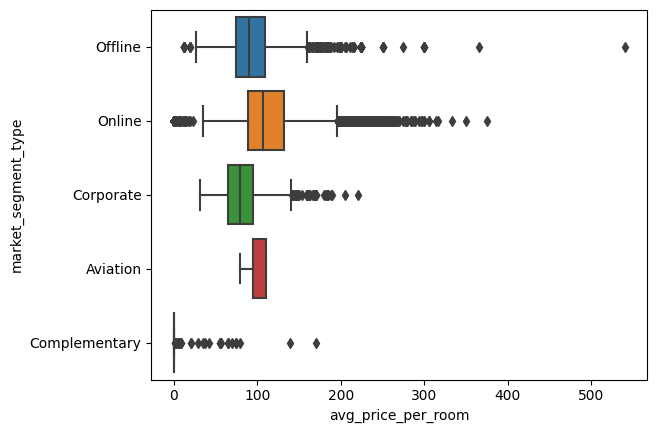

In [53]:
# room prices over market segments
sns.boxplot(data = df, x = 'avg_price_per_room', y = 'market_segment_type')

booking_status
Canceled        0.327636
Not_Canceled    0.672364
dtype: float64


<Axes: xlabel='booking_status'>

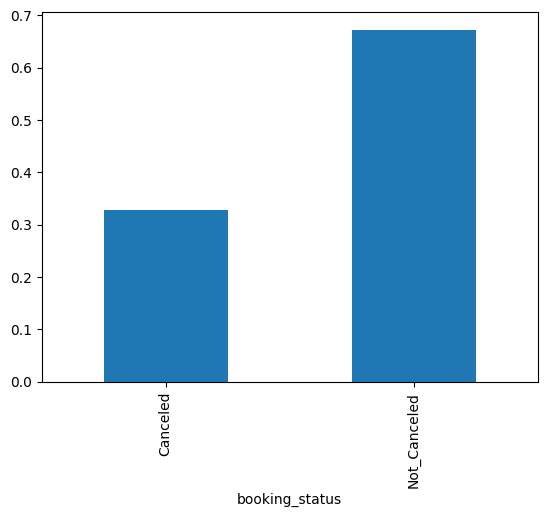

In [54]:
# how many bookings were canceled 
print(df.groupby('booking_status').size()/df.shape[0])
(df.groupby('booking_status').size()/df.shape[0]).plot(kind = 'bar')

repeated_guest  booking_status
0               Canceled          11869
                Not_Canceled      23476
1               Canceled             16
                Not_Canceled        914
dtype: int64
0.017204301075268817 0.33580421558919227


<Axes: xlabel='repeated_guest', ylabel='count'>

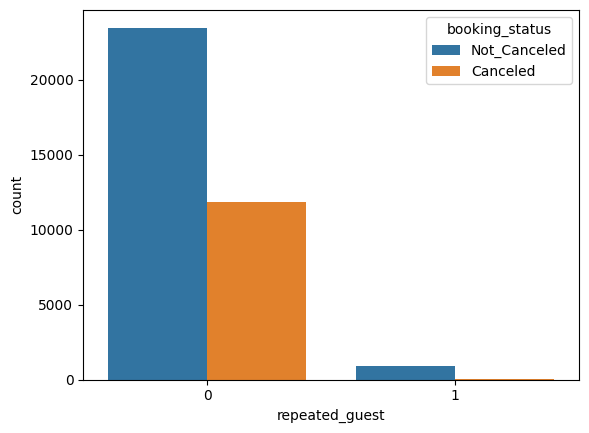

In [55]:
# Cancelation rate vs Repeated guests
print(df.groupby(['repeated_guest', 'booking_status']).size())
print(16/930, 11869/35345)
sns.countplot(data = df, hue = 'booking_status', x = 'repeated_guest')

no_of_special_requests  booking_status
0                       Canceled           8545
                        Not_Canceled      11232
1                       Canceled           2703
                        Not_Canceled       8670
2                       Canceled            637
                        Not_Canceled       3727
3                       Not_Canceled        675
4                       Not_Canceled         78
5                       Not_Canceled          8
dtype: int64


<Axes: xlabel='booking_status', ylabel='count'>

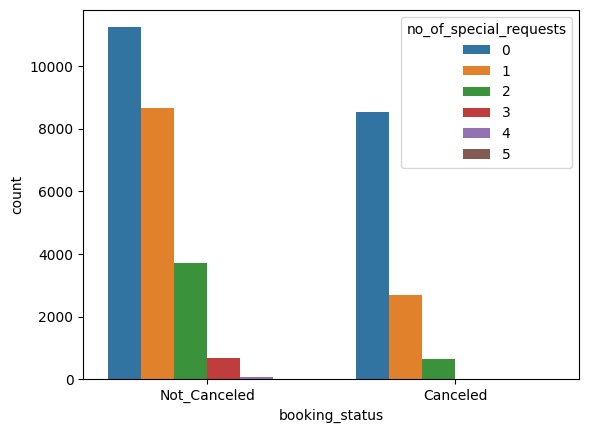

In [56]:

# number of special requests vs calcellation
print(df.groupby(['no_of_special_requests', 'booking_status']).size())
sns.countplot(data = df, x = 'booking_status', hue = 'no_of_special_requests')

Answering Questions:

What are the busiest months in the hotel?
- The busiest month is the hotel is - October (10th month)

Which market segment do most of the guests come from?
- The most guests come from Online segment.

Hotel rates are dynamic and change according to demand and customer demographics. 
What are the differences in room prices in different market segments?
- We can state that on average Online and Aviation have the highest price. Online segment has highest price variance also.

What percentage of bookings are canceled?
- 33 percents of all bookings were cancelled.

Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
- Amount repeating guest the percentage of cancellation is under 2%. Which is significantly lower than overall cancelation level - 33%.

Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
- We can see an inverse correlation between number of special requests and cancellations. The more special requests the less cancellations.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [57]:
# missing values check 

print(df.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [58]:

# features engineering - let's generate a couple of additional features e.g.:
# avg_price_per_room_per_adult, avg_price_per_room_per_total_guests, 
# no_of_special_requests_per_avg_price and no_of_special_requests_per_adult
# avg_price (or other denominators) can be zero - to avoid exception let's add +1
df['avg_price_per_room_per_adult'] = df['avg_price_per_room']/(df['no_of_adults'] + 1)
df['avg_price_per_room_per_total_guests'] = df['avg_price_per_room']/(df['no_of_adults']+df['no_of_children'])
df['no_of_special_requests_per_adult'] = df['no_of_special_requests']/(df['no_of_adults'] + 1)
df['no_of_special_requests_per_avg_price'] = df['no_of_special_requests']/(df['avg_price_per_room'] + 1) 

# remove target from features_cat
features_cat.remove('booking_status')
# create dummies for categories
X = pd.get_dummies(df, columns = features_cat, drop_first = True)
# select all numeric features for model
X = X.select_dtypes(include = ['int','float', 'uint8'])
Y = [1 if x=='Canceled' else 0 for x in df['booking_status']]

# Data preparation for modeling - let's split our data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 12)
print('Train set shape ',X_train.shape)
print('Test set shape ', X_test.shape)



Train set shape  (25392, 31)
Test set shape  (10883, 31)


In [59]:
# outliers were checked on previous stage - EDA almost all numeric variables have outliers

# we can apply StandardScaler to normalize all numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: xlabel='booking_status', ylabel='lead_time'>

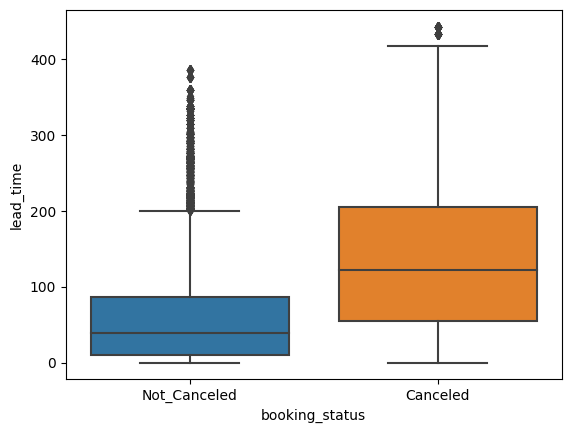

In [60]:
sns.boxplot(data = df, x = 'booking_status', y = 'lead_time')

<Axes: xlabel='repeated_guest', ylabel='Count'>

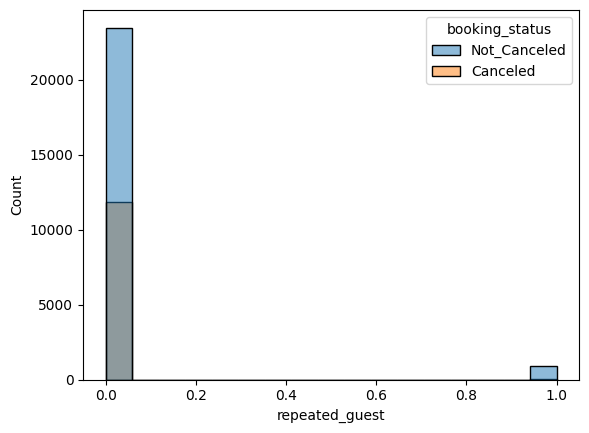

In [61]:
sns.histplot(data = df, hue = 'booking_status', x ='repeated_guest')

<Axes: xlabel='booking_status', ylabel='no_of_special_requests_per_avg_price'>

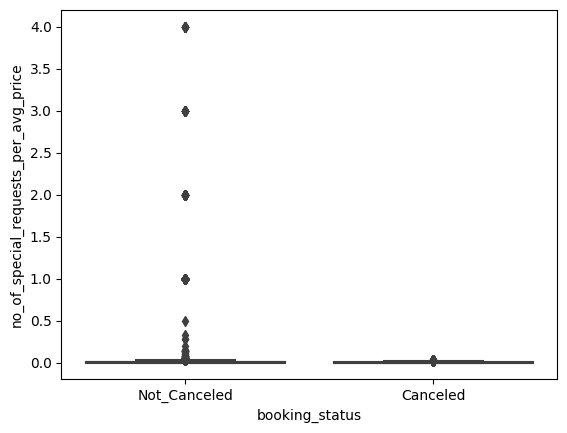

In [62]:
sns.boxplot(data = df, x = 'booking_status', y = 'no_of_special_requests_per_avg_price')

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

checking_vif(X)

,feature,VIF
0,no_of_adults,146.407823
1,no_of_children,4.727208
2,no_of_weekend_nights,1.996137
3,no_of_week_nights,3.780525
4,required_car_parking_space,1.071014
5,lead_time,2.468717
6,arrival_year,440.558818
7,arrival_month,7.227509
8,arrival_date,4.214669
9,repeated_guest,1.820905


Values higher than 10 are considered as Multicolinearity and should be dropped.

In [64]:
# dropping arrival_year, avg_price_per_room_per_adult, no_of_adults
X = X.drop(['arrival_year', 'avg_price_per_room_per_adult', 'no_of_adults', 'avg_price_per_room', 'no_of_special_requests', 'market_segment_type_Online'], axis = 1)
checking_vif(X)

,feature,VIF
0,no_of_children,2.113005
1,no_of_weekend_nights,1.903793
2,no_of_week_nights,3.401703
3,required_car_parking_space,1.059384
4,lead_time,2.376934
5,arrival_month,5.877340
6,arrival_date,3.573773
7,repeated_guest,1.797556
8,no_of_previous_cancellations,1.357933
9,no_of_previous_bookings_not_canceled,1.642461


In [65]:
# re-shaping train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 12)
print('Train set shape ',X_train.shape)
print('Test set shape ', X_test.shape)

Train set shape  (25392, 25)
Test set shape  (10883, 25)


## Building a Logistic Regression model

In [66]:
import statsmodels.api as sm

# fitting logistic regression model
logit = sm.Logit(np.asarray(y_train), X_train)

lg = logit.fit()

#summary of the model
print(lg.summary())

         Current function value: 0.441077
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Thu, 04 May 2023   Pseudo R-squ.:                  0.3018
Time:                        05:05:31   Log-Likelihood:                -11200.
converged:                      False   LL-Null:                       -16041.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.2612      0.059      4.431      0.000       0.146

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


We have warning - optimization failed to converge. And also we have multiple features with P > 0.5.

The model cannot be used but still let's calculate the performance.

## Model performance evaluation

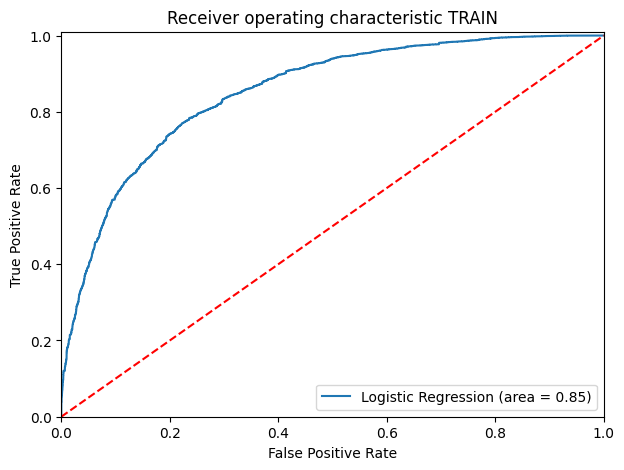

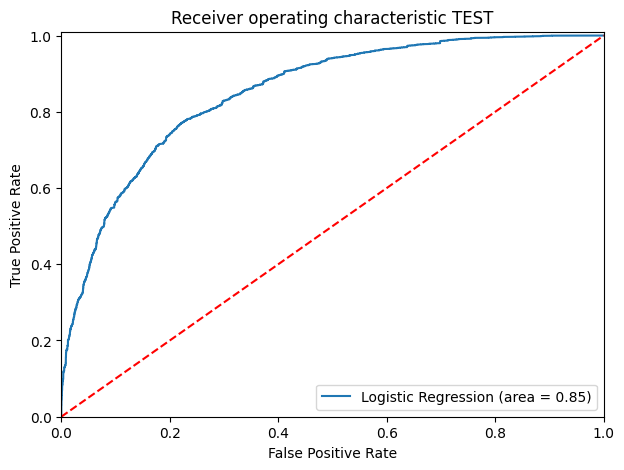

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(lg):
  # model 1 ROC CURVE
  logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
  fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
  plt.figure(figsize=(7, 5))
  plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
  plt.plot([0, 1], [0, 1], "r--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.01])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic TRAIN")
  plt.legend(loc="lower right")
  plt.show()

  logit_roc_auc_train = roc_auc_score(y_test, lg.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
  plt.figure(figsize=(7, 5))
  plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
  plt.plot([0, 1], [0, 1], "r--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.01])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver operating characteristic TEST")
  plt.legend(loc="lower right")
  plt.show()

plot_roc_curve(lg)

In [68]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3525149739257512


0.7951323251417769
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     17100
           1       0.72      0.62      0.66      8292

    accuracy                           0.80     25392
   macro avg       0.77      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392



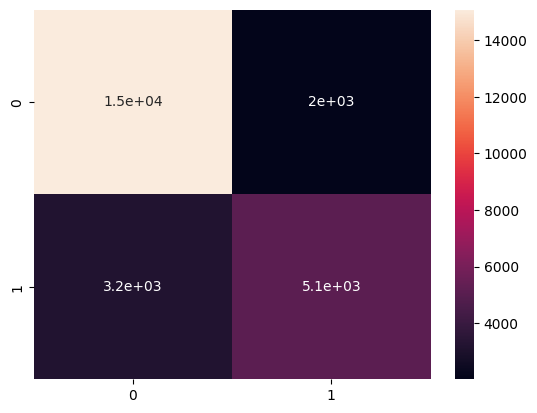

Test dataset results
0.7875585775980888
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7290
           1       0.71      0.60      0.65      3593

    accuracy                           0.79     10883
   macro avg       0.76      0.74      0.75     10883
weighted avg       0.78      0.79      0.78     10883



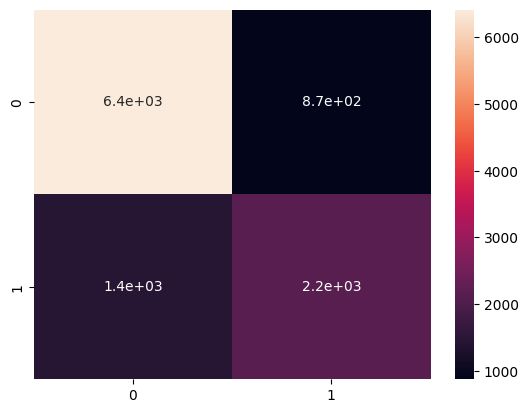

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def model_accuracy(lg1):
  predicted_train = lg1.predict(X_train)
  predicted_class_train1 = [1 if x>=0.5 else 0 for x in predicted_train]

  # creating confusion matrix
  print(accuracy_score(y_train, predicted_class_train1))
  print(classification_report(y_train, predicted_class_train1))

  sns.heatmap(confusion_matrix(y_train, predicted_class_train1), annot=True)
  plt.show()

  # summary on test
  predicted_test = lg1.predict(X_test)
  predicted_class_test1 = [1 if x>=0.5 else 0 for x in predicted_test]

  print('Test dataset results')
  print(accuracy_score(y_test, predicted_class_test1))
  print(classification_report(y_test, predicted_class_test1))

  sns.heatmap(confusion_matrix(y_test, predicted_class_test1), annot=True)
  plt.show()

model_accuracy(lg)

## Final Model Summary

Let's drop features with P > 0.5 and train model with L1 regularization to reduce overfitting.

In [70]:
# dropping P > 0.05
X = X.drop(['market_segment_type_Complementary', 'room_type_reserved_Room_Type 7', 'room_type_reserved_Room_Type 6',
            'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 4', 
'room_type_reserved_Room_Type 3', 'type_of_meal_plan_Not Selected', 'type_of_meal_plan_Meal Plan 3',
'no_of_previous_bookings_not_canceled', 'no_of_week_nights'], axis = 1)

# re-shaping train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 12)
print('Train set shape ',X_train.shape)
print('Test set shape ', X_test.shape)

# building another model
# fitting logistic regression model
logit = sm.Logit(np.asarray(y_train), X_train)
# we use regularized fit to  avoid overfitting
lg1 = logit.fit_regularized(method = 'l1')

#summary of the model
print(lg1.summary())

Train set shape  (25392, 15)
Test set shape  (10883, 15)


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4430966037024528
            Iterations: 102
            Function evaluations: 111
            Gradient evaluations: 102
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Thu, 04 May 2023   Pseudo R-squ.:                  0.2986
Time:                        05:05:33   Log-Likelihood:                -11251.
converged:                       True   LL-Null:                       -16041.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [71]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.34150951233675614


0.7709120982986768
              precision    recall  f1-score   support

           0       0.88      0.77      0.82     17100
           1       0.62      0.78      0.69      8292

    accuracy                           0.77     25392
   macro avg       0.75      0.77      0.75     25392
weighted avg       0.79      0.77      0.78     25392

Test dataset results
0.7723054304879169
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      7290
           1       0.63      0.77      0.69      3593

    accuracy                           0.77     10883
   macro avg       0.75      0.77      0.76     10883
weighted avg       0.79      0.77      0.78     10883



<Axes: >

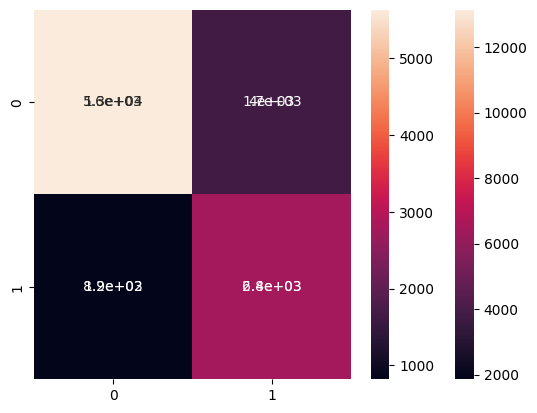

In [72]:
# implement optimal threshold for classification
predicted_train = lg1.predict(X_train)
predicted_class_train2 = [1 if x>=optimal_threshold_auc_roc else 0 for x in predicted_train]

# creating confusion matrix
print(accuracy_score(y_train, predicted_class_train2))
print(classification_report(y_train, predicted_class_train2))

sns.heatmap(confusion_matrix(y_train, predicted_class_train2), annot=True)

# summary on test
predicted_test = lg1.predict(X_test)
predicted_class_test2 = [1 if x>=optimal_threshold_auc_roc else 0 for x in predicted_test]

print('Test dataset results')
print(accuracy_score(y_test, predicted_class_test2))
print(classification_report(y_test, predicted_class_test2))

sns.heatmap(confusion_matrix(y_test, predicted_class_test2), annot=True)


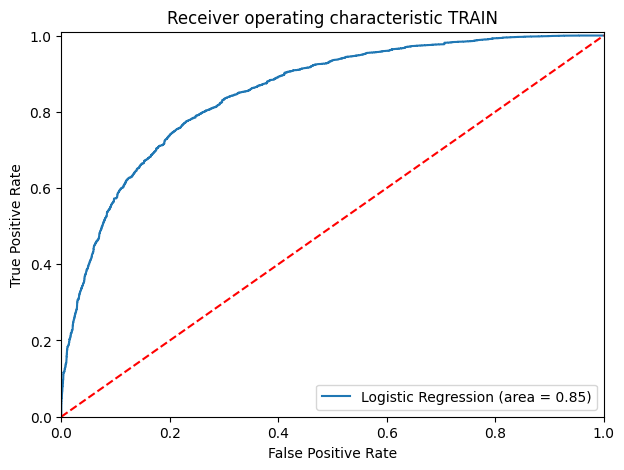

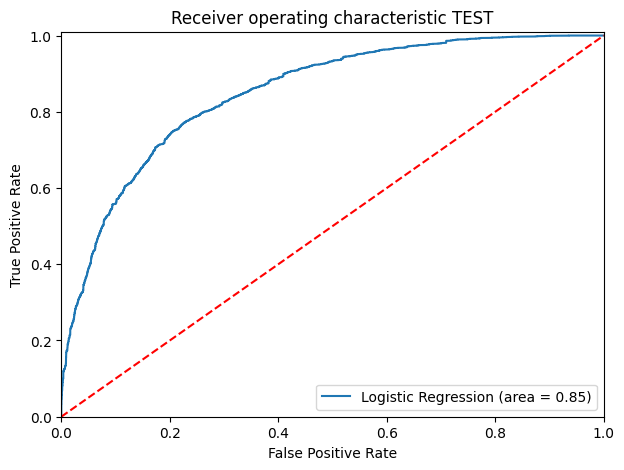

In [73]:
# MODEL 2 ROC CURVE (LOGIT with REGULARIZATION)
plot_roc_curve(lg1)

0.7951717076244487
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     17100
           1       0.71      0.62      0.66      8292

    accuracy                           0.80     25392
   macro avg       0.77      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392



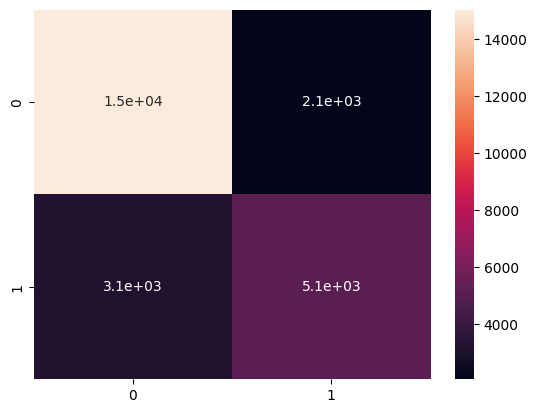

Test dataset results
0.7906827161628227
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7290
           1       0.72      0.61      0.66      3593

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.79      0.79      0.79     10883



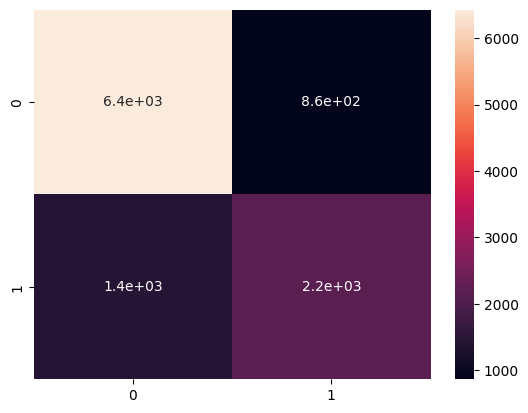

In [74]:
model_accuracy(lg1)

After comparison optimal threshold value for classification (0.34) and default threshold for classification (0.5) we can see that default threshold is a champion. So we use default threshold model for future final comparison.

## Building a Decision Tree model

In [75]:
tree_model = DecisionTreeClassifier(random_state=12)

tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=12)

## Do we need to prune the tree?

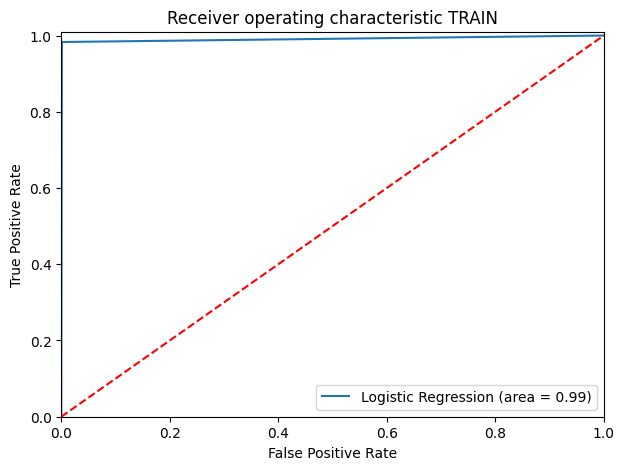

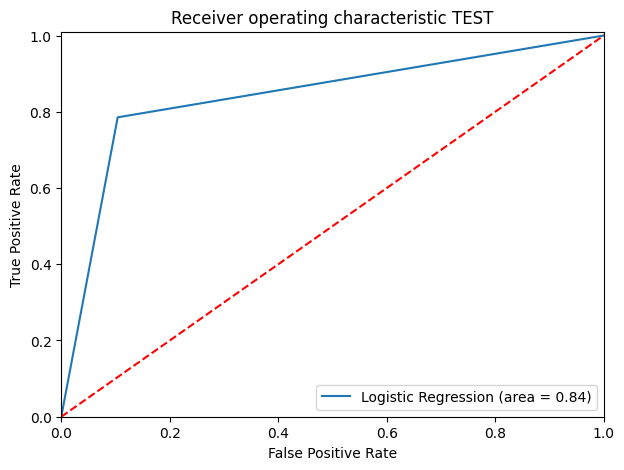

In [76]:
plot_roc_curve(tree_model)

0.9936988027725268
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17100
           1       1.00      0.98      0.99      8292

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



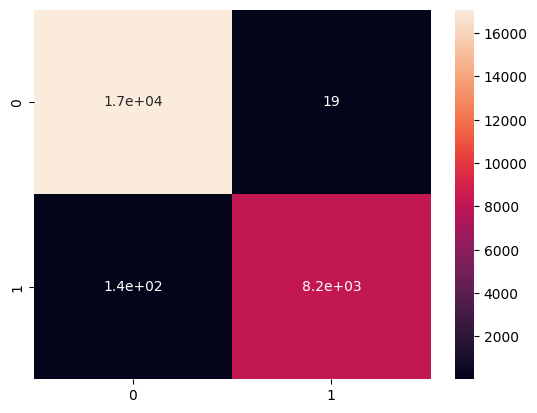

Test dataset results
0.859505651015345
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7290
           1       0.79      0.79      0.79      3593

    accuracy                           0.86     10883
   macro avg       0.84      0.84      0.84     10883
weighted avg       0.86      0.86      0.86     10883



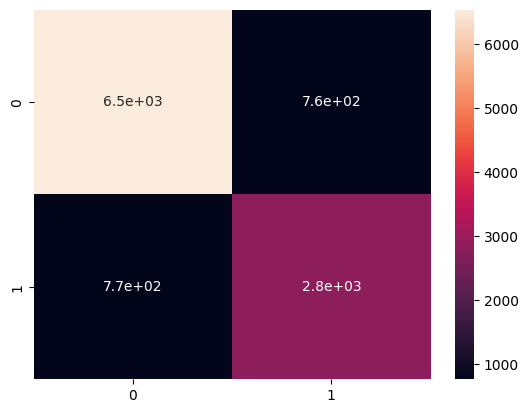

In [77]:
model_accuracy(tree_model)

After comparison train and test sets model performance we can claim overfitting has place here. Perfect separation - 99% accuracy for train and significant drop for test - 86% accuracy.

Let's use GridSearchCV to find a best pre-pruned tree model not overfitted to the train data.

In [78]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 8, 2),
    "max_leaf_nodes": [50, 75, 150],
    "min_samples_split": [10, 30, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

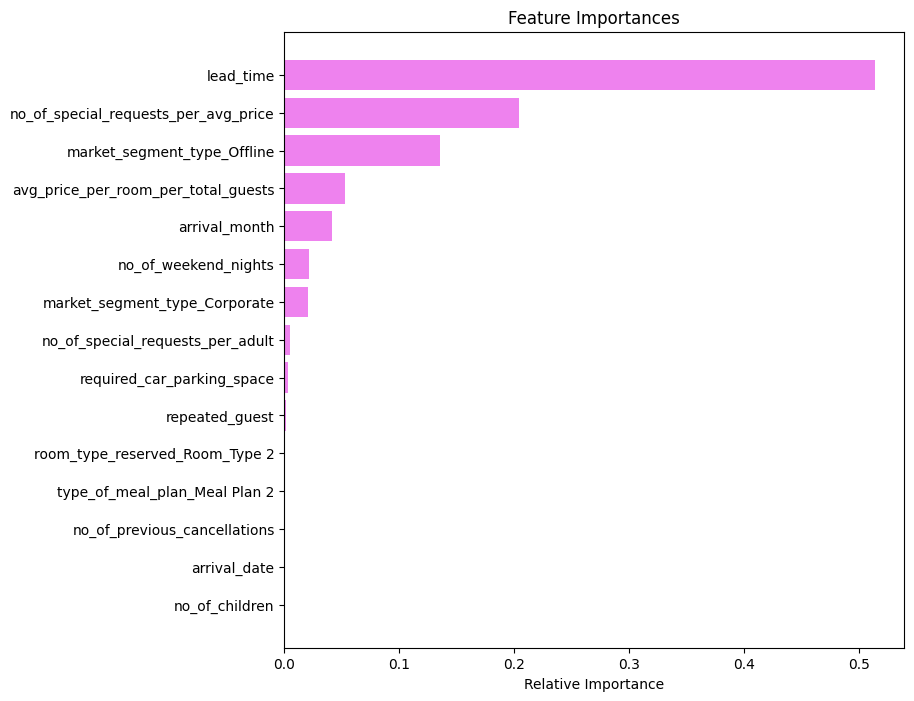

In [79]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

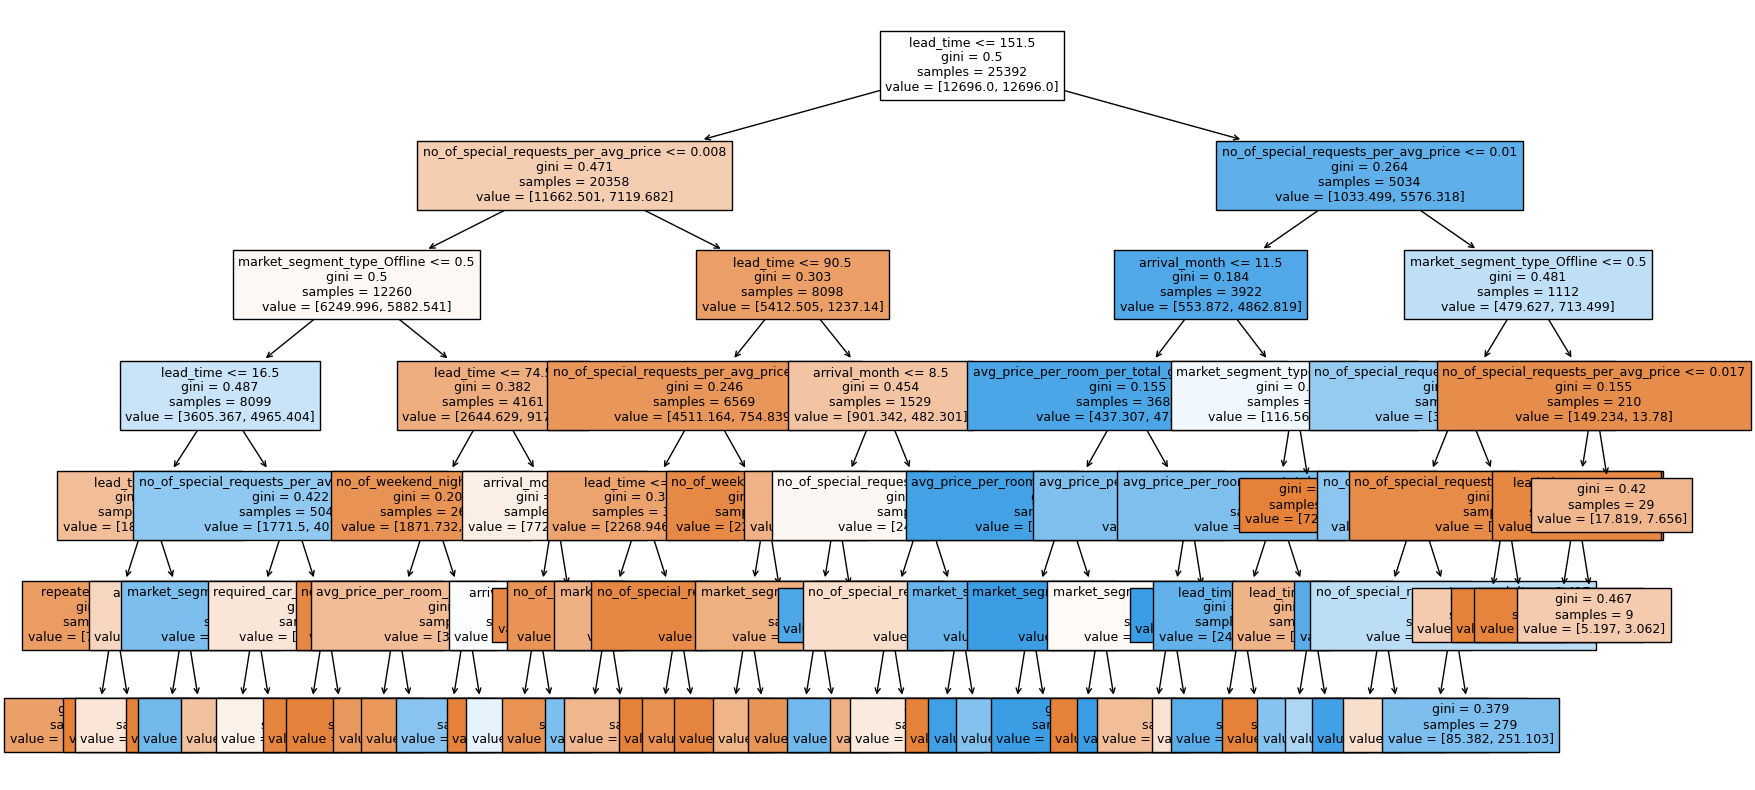

In [80]:
from sklearn import tree

plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Model Performance Comparison and Conclusions

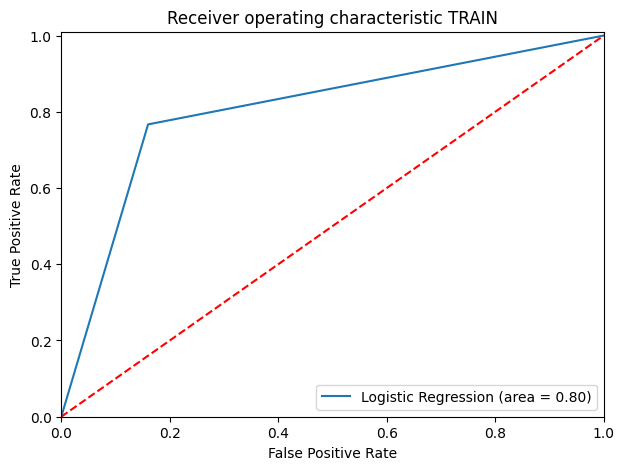

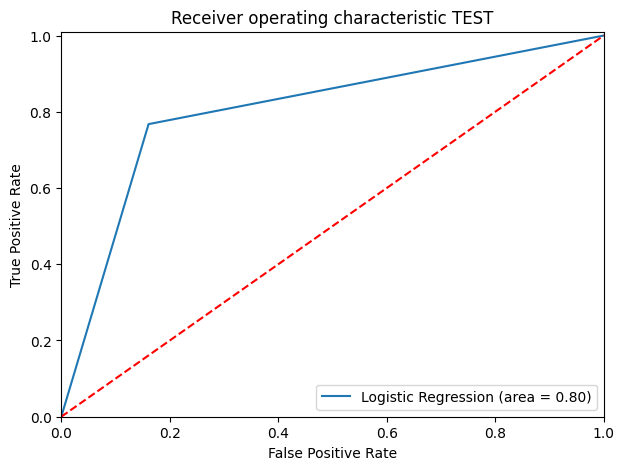

In [81]:
plot_roc_curve(estimator)


0.8161231884057971
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     17100
           1       0.70      0.77      0.73      8292

    accuracy                           0.82     25392
   macro avg       0.79      0.80      0.80     25392
weighted avg       0.82      0.82      0.82     25392



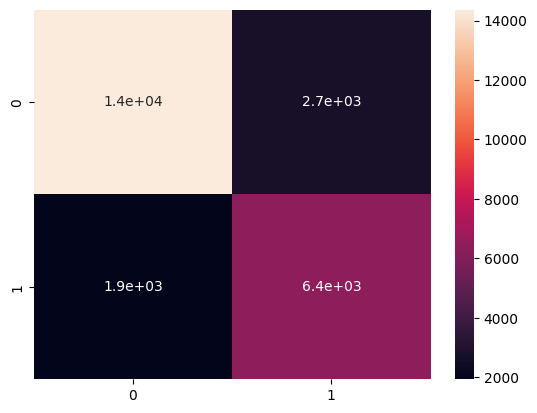

Test dataset results
0.8154920518239456
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7290
           1       0.70      0.77      0.73      3593

    accuracy                           0.82     10883
   macro avg       0.79      0.80      0.80     10883
weighted avg       0.82      0.82      0.82     10883



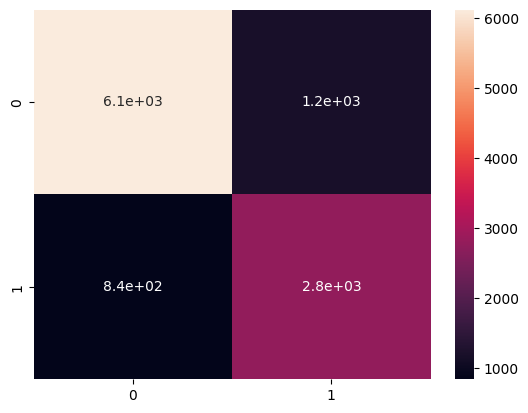

In [82]:
model_accuracy(estimator)

In [83]:
# MODELS COMPARISON ON TEST DATA

def test_accuracy(clf):  
  predicted_test = clf.predict(X_test)
  predicted_class_test = [1 if x>=0.5 else 0 for x in predicted_test]

  print('Test dataset results model ==========')
  print(accuracy_score(y_test, predicted_class_test))
  print(classification_report(y_test, predicted_class_test))

for clf in [lg1, tree_model, estimator]:
  test_accuracy(clf)

Test dataset results model ==========
0.7906827161628227
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7290
           1       0.72      0.61      0.66      3593

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.79      0.79      0.79     10883

Test dataset results model ==========
0.859505651015345
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7290
           1       0.79      0.79      0.79      3593

    accuracy                           0.86     10883
   macro avg       0.84      0.84      0.84     10883
weighted avg       0.86      0.86      0.86     10883

Test dataset results model ==========
0.8154920518239456
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7290
           1       0.70      0.77      0.73      3593

    accuracy

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

We can see Lead Time is the strongest variable to classify cancelled booking. The hotels could use this to implement one of the following policies:

1. Implement non-refund policy if Lead Time is 100 or more days (optimal number of days can be defined in a separate research)

2. As last moment cancellation is the most critical situation as it is impossible to re-sell the unit to another guest - it can be applied flexible inverse remaining days penalties - e.g. cancel booking 10 days before arriving date will cost 10% or the booking price, cancel booking 1 day before arriving date - 50% of the price, cancel less than 24 hours - 100% of the price (no return)

3. Returned guests usually do not cancel their booking - they can be excemtion from any limitations or non-refund policies. 
 